In [105]:
import pandas as pd
import requests
from bs4 import BeautifulSoup as soup
from requests import get
import matplotlib.pyplot as plt
%matplotlib inline

url = get("https://www.imdb.com/search/title/?genres=action&sort=user_rating,desc&title_type=feature&num_votes=25000,&pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=5aab685f-35eb-40f3-95f7-c53f09d542c3&pf_rd_r=BG1CG1TDYDB4FQYYS55B&pf_rd_s=right-6&pf_rd_t=15506&pf_rd_i=top&ref_=chttp_gnr_1")
request = url.text

data = soup(request, 'html.parser')
divs = data.find_all('div', {'class': 'lister-item mode-advanced'})

In [106]:
movie_name = []
description = []
release_date = []
director_name = []
rating = []
duration = []
votes = []
stars = []
budget = []
genre = []

# movie_name
for div in divs:
    content = div.find('div', {'class': 'lister-item-content'})
    titles = content.find('a').get_text()
    movie_name.append(titles)

# rating
for div in divs:
    content = div.find('div', {'class': 'lister-item-content'})
    rate = content.find('strong').get_text()
    rating.append(rate)

# duration
for div in divs:
    content = div.find('div', {'class': 'lister-item-content'})
    time = content.find('span', {'class': 'runtime'}).get_text()[:3]
    duration.append(int(time))

# release_date
for div in divs:
    content = div.find('span',{'class': 'lister-item-year text-muted unbold'}).text
    for text in content.split():
        num = text.replace("(", "").replace(")", "")
        if num.isdigit():
            release_date.append(int(num))

# votes
for div in divs:
    content = div.find('div', {'class': 'lister-item-content'})
    vote = content.find('span', {'name': 'nv'}).get_text().replace(',','')
    if vote == "[]":
        vote = None
    else:
        votes.append(int(vote))

# director_name
for div in divs:
    content = div.find('div', {'class': 'lister-item-content'})
    find_p = content.find_all('p')[2]
    find_a = find_p.find_all('a')[0].get_text()
    director_name.append(find_a)

# genre
for div in divs:
    content = div.find('div', {'class': 'lister-item-content'})
    gernes = content.find('p')
    ger = gernes.find('span', {'class' : "genre"}).get_text().strip('\n')
    genre.append(ger)

# stars
for div in divs:
    star_list = []
    content = div.find('div', {'class': 'lister-item-content'})
    find_p = content.find_all('p')[2]
    find_a = find_p.find_all('a')[1:4]
    for e in find_a:
        star_list.append(e.get_text())
    stars.append(", ".join(star_list))

# budget
for div in divs:
    content = div.find('div',{'class': 'lister-item-content'})
    find_p = content.find_all('p')[3]
    find_span = find_p.find_all('span')[-1].text.replace("$", "").replace("M", "").replace(".", "").replace(",", "")
    budget.append(int(find_span))

In [107]:
data_df = {}

data_df["Movie name"] = movie_name
data_df["Release date"] = release_date
data_df["Director name"] = director_name
data_df["Rating over 10"] = rating
data_df["Duration in min"] = duration
data_df["Genre"] = genre
data_df["Stars"] = stars
data_df["Votes"] = votes
data_df["Budget in M$"] = budget

df = pd.DataFrame(data_df)
df

,Movie name,Release date,Director name,Rating over 10,Duration in min,Genre,Stars,Votes,Budget in M$
0,El caballero oscuro,2008,Christopher Nolan,9.0,152,"Action, Crime, Drama","Christian Bale, Heath Ledger, Aaron Eckhart",2329294,53486
1,El señor de los anillos: El retorno del rey,2003,Peter Jackson,8.9,201,"Action, Adventure, Drama","Elijah Wood, Viggo Mortensen, Ian McKellen",1657517,37785
2,Montaña II,2016,Alper Caglar,8.8,135,"Action, Drama, War","Caglar Ertugrul, Ufuk Bayraktar, Ahu Türkpençe",105546,105546
3,Origen,2010,Christopher Nolan,8.8,148,"Action, Adventure, Sci-Fi","Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",2090114,29258
4,El señor de los anillos: La comunidad del anillo,2001,Peter Jackson,8.8,178,"Action, Adventure, Drama","Elijah Wood, Ian McKellen, Orlando Bloom",1677215,31554
5,El señor de los anillos: Las dos torres,2002,Peter Jackson,8.7,179,"Action, Adventure, Drama","Elijah Wood, Ian McKellen, Viggo Mortensen",1498876,34255
6,Matrix,1999,Lana Wachowski,8.7,136,"Action, Sci-Fi","Lilly Wachowski, Keanu Reeves, Laurence Fishburne",1693370,17148
7,El Imperio contraataca,1980,Irvin Kershner,8.7,124,"Action, Adventure, Fantasy","Mark Hamill, Harrison Ford, Carrie Fisher",1169118,29048
8,La guerra de las galaxias,1977,George Lucas,8.6,121,"Action, Adventure, Fantasy","Mark Hamill, Harrison Ford, Carrie Fisher",1241131,32274
9,Harakiri,1962,Masaki Kobayashi,8.6,133,"Action, Drama, Mystery","Tatsuya Nakadai, Akira Ishihama, Shima Iwashita",43514,43514


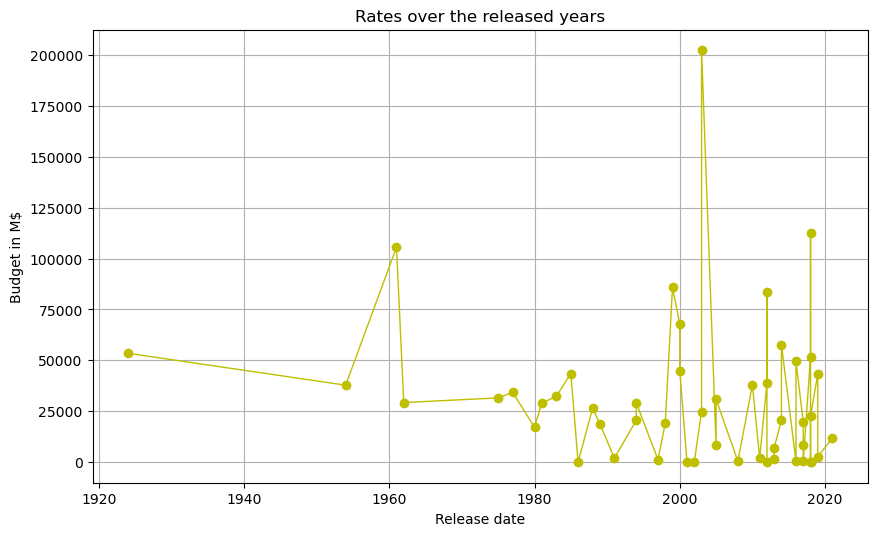

In [108]:
plt.figure(figsize = (10, 6), dpi = 100)
plt.plot(sorted(data_df["Release date"]), data_df["Budget in M$"], color = "y", linewidth = 1, marker = "o")
plt.xlabel("Release date")
plt.ylabel("Budget in M$")
# plt.title("Total profit of all months")
plt.title("Rates over the released years")
plt.grid()
plt.show()